## Librería para gráficos interactivos

Plotly

#instalación en visual studio (desde el cmd) no ejecuten esto

pip install plotly

pip install nbformat --upgrade

Cada uno por separado

Datos atípicos

In [6]:
# se cargan las librerias
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#se carga el data frame
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/jarsmp37/introds/main/Churn_Bank.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1.0,15634602.0,Hargrave,619,France,Female,NaN,2,0.0,1.0,1,1,101348.88,1,1,2,DIAMOND,464
1,2.0,15647311.0,Hill,608,Spain,Female,41.0,1,83807.86,1.0,0,1,112542.58,0,1,3,DIAMOND,456
2,3.0,15619304.0,Onio,502,France,Female,42.0,8,159660.8,3.0,1,0,113931.57,NaN,1,3,DIAMOND,377
3,4.0,15701354.0,Boni,699,France,Female,39.0,1,0.0,2.0,0,0,93826.63,0,invalid_value,5,GOLD,350
4,5.0,15737888.0,Mitchell,850,Spain,Female,NaN,2,125510.82,1.0,1,1,invalid_value,0,0,5,GOLD,425


In [8]:
#Para datos atípicos se necesita el boxplot numérico, se convertira la columna en este caso age a numérica
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [9]:
#se verifica que ya es numérico
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           12069 non-null  object 
 1   CustomerId          12050 non-null  object 
 2   Surname             12083 non-null  object 
 3   CreditScore         12080 non-null  object 
 4   Geography           12076 non-null  object 
 5   Gender              12069 non-null  object 
 6   Age                 11943 non-null  float64
 7   Tenure              12079 non-null  object 
 8   Balance             12065 non-null  object 
 9   NumOfProducts       12085 non-null  object 
 10  HasCrCard           12052 non-null  object 
 11  IsActiveMember      12076 non-null  object 
 12  EstimatedSalary     12061 non-null  object 
 13  Exited              12065 non-null  object 
 14  Complain            12060 non-null  object 
 15  Satisfaction Score  12060 non-null  object 
 16  Card

In [10]:
#se grafica de forma interactiva con plotly el boxplot (se puede usar seaborn o matplotlib)
fig = px.box(df, y='Age', title='Detección de datos atípicos')
fig.update_layout(width=300,height=500) 
fig.show()

Se utilizará el método de rango intercuartílico en la columna age

In [11]:
#Se define el cuartil 75 y se le resta el cuartil 25
iqr = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
#Desarrollamos filtros superior o inferior por lo general es el iqr por 1.5 pero se puede manejar el número
filtro_inferior = df['Age'] > df['Age'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['Age'] < df['Age'].quantile(0.75) + (iqr * 1.3)

df_filtrado = df[filtro_inferior & filtro_superior]

#Graficando el boxplot
fig = px.box(df_filtrado, y='Age', title='Datos atípicos eliminados')
fig.update_layout(width=300,height=500) 
fig.show() 

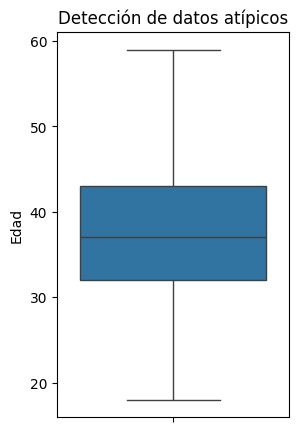

In [13]:
# o con seaborn
# Generar el boxplot con Seaborn
plt.figure(figsize=(3, 5))  # Ajusta el tamaño de la figura
sns.boxplot(y='Age', data=df_filtrado)

# Agregar título y etiquetas
plt.title('Detección de datos atípicos')
plt.ylabel('Edad')
plt.show()